In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Visualize the clusters using scatter plots
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('HatchData.csv')
df.head()


,Bulb_Data,Fan_Data,Humidity_Data,Temperature_Data,Valve_Data,Message_Temp,Message_Humid
0,1,1,83.8,28.5,0,Too cold,Well
1,1,1,86.0,29.9,0,Too cold,Well
2,1,1,82.1,30.9,0,Too cold,Well
3,1,1,77.6,31.5,0,Too cold,Well
4,1,1,73.9,31.9,0,Too cold,Well


c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

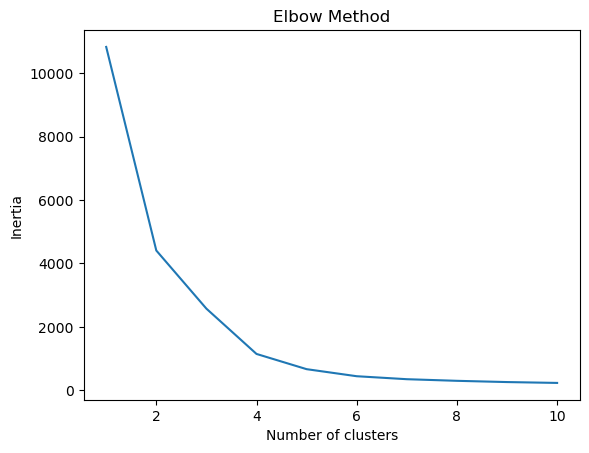

c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\oscar\AppData\Local\Temp\ipykernel_20412\3109036696.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()


In [13]:
# Step 2: Select the relevant columns
X = df[['Humidity_Data', 'Temperature_Data', 'Valve_Data']]

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 6: Get the cluster labels
labels = kmeans.labels_

# Step 7: Analyze the clusters
df['Cluster'] = labels
df.groupby('Cluster').mean()

# Step 8: Assign cluster labels to data points
df['Cluster'] = labels

# Step 9: Fill the Hatch Rate column
hatch_rate_map = {0: 'low', 1: 'medium', 2: 'high'}
df['Hatch_Rate'] = df['Cluster'].map(hatch_rate_map)

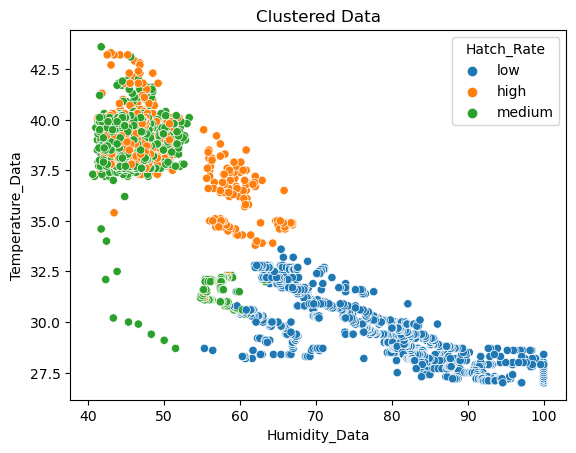

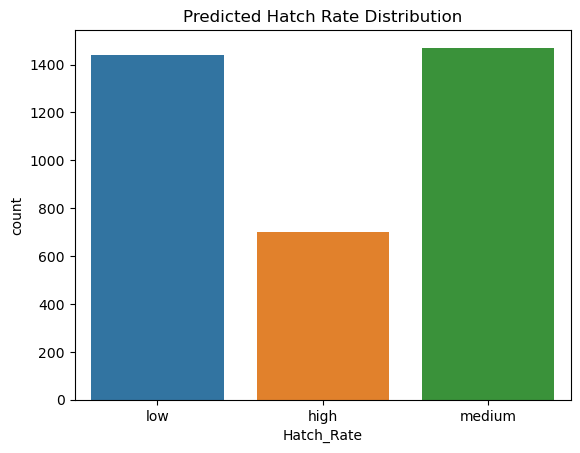

In [14]:
import seaborn as sns

# Visualize the clusters
sns.scatterplot(x='Humidity_Data', y='Temperature_Data', hue='Hatch_Rate', data=df)
plt.title('Clustered Data')
plt.show()

# Visualize the predicted Hatch Rate distribution
sns.countplot(x='Hatch_Rate', data=df)
plt.title('Predicted Hatch Rate Distribution')
plt.show()

In [15]:
# Step 9: Read real-time data
# Importing required libraries
import requests

# Getting real-time temperature and humidity data from API
response = requests.get("https://eggincubator-825e1-default-rtdb.firebaseio.com/.json")
data = response.json()

# Extracting real-time temperature and humidity values
temp = data['Temperature']
humid = data['Humidity']
vav = data['ValveStatus']



# Step 10: Create pandas dataframe
new_data = pd.DataFrame({'Humidity_Data': [humid],
                         'Temperature_Data': [temp],
                         'Valve_Data': [vav]})

# Step 11: Standardize the data
new_data_scaled = scaler.transform(new_data)

# Step 12: Predict cluster label
new_label = kmeans.predict(new_data_scaled)[0]

# Step 13: Map predicted label to hatch rate
new_hatch_rate = hatch_rate_map[new_label]

# # Step 14: Display predicted hatch rate
# print('Predicted Hatch Rate:', new_hatch_rate)

def get_hatch_rate():
    return new_hatch_rate

Predicted Hatch Rate: high
